# 🏠 Домашнее задание: Ансамблевые модели
**Датасет:** California Housing (из `sklearn.datasets`)

Всего 18 заданий:
- 10 заданий — только код
- 2 задания — развернутый ответ
- 3 задания — код + развернутый ответ
- 2 задания повышенной сложности на бонусный балл — Optuna

Обратите внимание:
  - Все модели должны использовать random_state=42 при инициализации.
  - Все метрики должны рассчитываться на train и test, если не указано иное.

## Задание 1
**[код 0.5]** Загрузите датасет California Housing и выполните разбиение на `X_train`, `X_test`, `y_train`, `y_test`, оставив 20% данных на тест.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## Задание 2
**[код 0.5]** Выполните стандартизацию признаков с помощью `StandardScaler`.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Задание 3
**[код 1]** Обучите `BaggingRegressor` с базовым `DecisionTreeRegressor` и выведите R² и MAE.

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train_scaled, y_train)
y_pred = bagging.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2: {r2:.4f}')
print(f'MAE: {mae:.4f}')

R2:  0.8048
Mae: 0.3278


## Задание 4
**[код + ответ 2]** Обучите `RandomForestRegressor` в рамках `Pipeline`, проведите кросс-валидацию по 5 фолдам и метрике `r2`, сравните результаты с `BaggingRegressor`. Объясните различия.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

pipe_rf = make_pipeline(
    RandomForestRegressor(n_estimators=100, random_state=42)
)

scores_rf = cross_val_score(pipe_rf, X, y, cv=5, scoring='r2')
print(f"RandomForest R2: {scores_rf.mean():.3f} ± {scores_rf.std():.3f}")

RandomForest R2: 0.656 ± 0.078


### Ваш ответ:
- Кажется, по метрикам, что Bagging работает лучше, но...

- Значительное расхождение в R2 во многом вызвано неоднородными метриками оценки (единственный split против CV)

- Алгоритмически RandomForest более консервативен меньше переобучается, но при этом может недообучаться на некоторых фолдах, что и скорее всего даёт более низкое среднее R2 и высокий разброс

## Задание 5
**[код 1]** Подберите гиперпараметры `RandomForest` через `GridSearchCV`. Используйте не менее трех комбинаций параметров.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print('Best param:', grid_search.best_params_)
print('Best CV R2: {:.3f}'.format(grid_search.best_score_))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best param: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best CV R2: 0.815


## Задание 6
**[код 0.5]** Обучите `GradientBoostingRegressor` и выведите метрики.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)

r2 = gbr.score(X_test_scaled, y_test)
mae = sum(abs(y_test - y_pred)) / len(y_test)

print(f'R2: {r2:.4f}')
print(f'MAE: {mae:.4f}')

R2:  0.7756
MAE: 0.3717


## Задание 7
**[код + ответ 2]** Постройте график зависимости ошибки модели `GradientBoostingRegressor` от параметра `n_estimators` и прокомментируйте. Число базовых моделей возьмите [10, 310) с шагом 20.

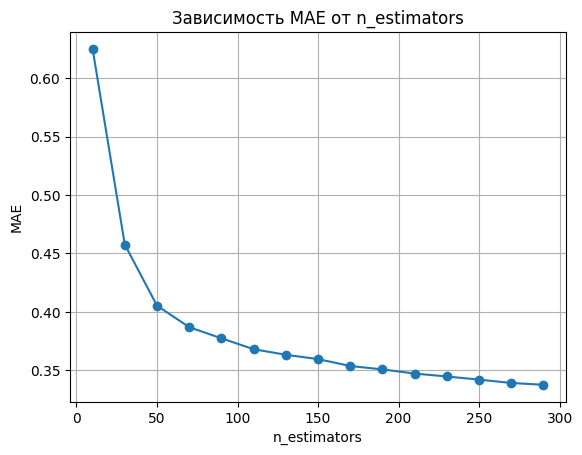

In [ ]:
from matplotlib import pyplot as plt

n_estimators_range = range(10, 310, 20)

errors = []

for n in n_estimators_range:
    model = GradientBoostingRegressor(n_estimators=n, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = sum(abs(y_test - y_pred)) / len(y_test)
    errors.append(mae)

plt.figure()
plt.plot(list(n_estimators_range), errors, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('Зависимость MAE от n_estimators')
plt.grid(True)

### Ваш ответ:
- График говорит, что MAE сначала заметно снижается с увеличением числа деревьев и достигает наибольшего выигрыша примерно к 150-200 деревьям, после чего дальнейшее увеличение даёт всё меньше улучшений и кривая выходит на плато
- Это говорит о том, что модель быстро переходит из зоны недообучения в зону «насыщения»


## Задание 8
**[код 0.5]** Обучите `XGBRegressor`, выведите R² и RMSE.

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

xgbr = xgb.XGBRegressor(random_state=42)
xgbr.fit(X_train_scaled, y_train)

y_pred = xgbr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f'R2: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R2: 0.8301
RMSE: 0.2226


## Задание 9
**[код 0.5]** Обучите `LGBMRegressor` и сравните метрики с `XGBoost`.

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train_scaled, y_train)

y_pred_lgbm = lgbm.predict(X_test_scaled)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm)

print(f'R2: {r2_lgbm:.4f}')
print(f'RMSE: {rmse_lgbm:.4f}')

# Выдал очень похожие метрики с XGBoost

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
R2: 0.8386
RMSE: 0.2115


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Задание 10
**[код 1]** Обучите `CatBoostRegressor` (с `verbose=0`) и выведите `feature_importances_`.

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose=0, random_state=42)
cb.fit(X_train_scaled, y_train)

importances = cb.feature_importances_
print('Фичи:', importances)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00
Фичи: [33.48734969  5.43522632  3.54738669  1.92054693  1.90036329 13.88277332
 21.1845296  18.64182416]


## Задание 11
**[ответ 1]** Сравните `XGB`, `LGBM`, `CatBoost`. Объясните различия.

### Ваш ответ:
...

## Задание 12
**[код 1]** Постройте стекинг-модель: `RandomForest`, `LGBM`, `CatBoost` + `Ridge`.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42))
]

stack_model = StackingRegressor(
    estimators=estimators,
    final_estimator=Ridge(random_state=42),
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train_scaled, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf', RandomForestRegressor(random_state=42)),
                              ('lgbm', LGBMRegressor(random_state=42)),
                              ('cat',
                               <catboost.core.CatBoostRegressor object at 0x7fa2b6bb8e90>)],
                  final_estimator=Ridge(random_state=42), n_jobs=-1)

## Задание 13
**[код 2]** Постройте `Pipeline` для стекинг-модели: BaggingRegressor(DT), GB, XGB + Ridge. Подберите параметры для `Ridge` по `GridSearchCV`.


In [ ]:
stack = StackingRegressor(
    estimators=[
        ('bag', BaggingRegressor(
            DecisionTreeRegressor(random_state=42),
            n_estimators=100,
            random_state=42
        )),
        ('gb', GradientBoostingRegressor(random_state=42)),
        ('xgb', xgb.XGBRegressor(random_state=42))
    ],
    final_estimator=Ridge(random_state=42),
    cv=5,
    n_jobs=-1
)

pipeline = make_pipeline(stack)
param_grid = {
    'stackingregressor__final_estimator__alpha': [0.1, 1.0, 10.0],
    'stackingregressor__final_estimator__solver': ['auto', 'svd']
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

print('Best Ridge params:', grid.best_params_)
print(f'Best CV R2: {grid.best_score_:.3f}')

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Ridge params: {'stackingregressor__final_estimator__alpha': 0.1, 'stackingregressor__final_estimator__solver': 'auto'}
Best CV R2: 0.834


## Задание 14
**[ответ 0.5]** Объясните разницу между `Bagging` и `Boosting`.

### Ваш ответ:

- Ключевая разница в том, что Bagging борется с дисперсией, усредняя многие "независимые" сильные модели, а Boosting — с систематической ошибкой, последовательно усиливая слабые модели на наиболее сложных примерах

## Задание 15
**[код + ответ 1]** Выведите R², MAE, MSE, RMSE, MAPE для лучшей на текущий момент модели. Объясните, какую метрику использовать в бизнесе, где важна точность в процентах.

### Ваш ответ:
- В бизнесе, где важна точность в процентах, обычно выбирают MAPE, поскольку она показывает среднюю абсолютную ошибку. Это позволяет легко интерпретировать, насколько в среднем ваше предсказание "промахивается" в процентах от реального значения

## Задание 16 (Бонусное, Optuna)
**[код 1]** Настройте `LGBMRegressor` через `Optuna`: `max_depth`, `learning_rate`, `n_estimators`.

In [4]:
!pip install optuna
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500)
    }
    model = LGBMRegressor(random_state=42, **params)
    return cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best params:', study.best_params)
print(f'Best CV R2: {study.best_value:.3f}')

[I 2025-06-09 20:39:48,038] A new study created in memory with name: no-name-7f046488-82b2-410c-91bc-ba1acff14d7d
<ipython-input-4-582c914f8bf5>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
[I 2025-06-09 20:39:54,318] Trial 0 finished with value: 0.7347059662071085 and parameters: {'max_depth': 3, 'learning_rate': 0.016246470234485267, 'n_estimators': 240}. Best is trial 0 with value: 0.7347059662071085.
[I 2025-06-09 20:40:00,663] Trial 1 finished with value: 0.5997870216509378 and parameters: {'max_depth': 12, 'learning_rate': 0.0020170083080062354, 'n_estimators': 471}. Best is trial 0 with value: 0.7347059662071085.
[I 2025-06-09 20:40:05,207] Trial 2 finished with value: 0.8425897869615445 and parameters: {'max_depth': 11, 'learning_rate': 0.037165

Best params: {'max_depth': 12, 'learning_rate': 0.06800339421403391, 'n_estimators': 454}
Best CV R2: 0.846


## Задание 17 (Optuna + Pruner)
**[код + ответ 2]** Используйте `Optuna` с `pruner`, чтобы ускорить подбор гиперпараметров для `CatBoostRegressor`. Используйте `SuccessiveHalvingPruner` или `MedianPruner`. Покажите, как уменьшается число итераций без потери качества.

In [ ]:
!pip install catboost
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from optuna.pruners import SuccessiveHalvingPruner

def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
    }
    model = CatBoostRegressor(
        random_state=42,
        verbose=0,
        **params
    )
    return cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1).mean()

study = optuna.create_study(
    direction='maximize',
    pruner=SuccessiveHalvingPruner()
)
study.optimize(objective, n_trials=50)

print('Best params:', study.best_params)
print(f'Best CV R2: {study.best_value:.3f}')

pruned = len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])
complete = len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])

print(f'Completed trials: {complete}')
print(f'Pruned trials: {pruned}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.5 MB/s eta 0:00:00


[I 2025-06-09 20:44:40,206] A new study created in memory with name: no-name-7b41e9ff-6345-4d54-9a42-e27dc931a17d
<ipython-input-6-d3b664857867>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
<ipython-input-6-d3b664857867>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10),
[I 2025-06-09 20:45:47,094] Trial 0 finished with value: 0.8475700222035822 and parameters: {'depth': 8, 'learning_rate': 0.03432236179110206, 'l2_leaf_reg': 0.001095007537783627}. Best is trial 0 with value: 0.8475700222035822.


### Ваш ответ:
...